# FINAL PROJECT

Visualization notebook: Choose a dataset, formulate an interesting hypothesis, and use
visualization to explore this. Your project should comprise an IPython notebook that develops
the visualization in increments, using code and text cells, similar in format to the notebooks used
in this class. Include a concluding text cell that summarizes your findings.

### Project- 

Breast cancer is one of the most common cancers found worldwide. It has been a topic of great research and early diagnosis of the same provides a possibility for the cure. An early dianosis can improve the prognosis and chance of survival significantly by providing timely intervention to the patients. Moreover, accurate classification of benign tumors can prevent patients undergoing unnecessary treatments. Thus, the correct diagnosis of BC and classification of patients into malignant or benign groups is the subject of much research.
The objective of this project is to use the aspects of data analysis and visualization on the **Breast Cancer Wisconsin (Diagnostic) Data Set**. This project aimes to observe the relation between various features and potentially to observe which features are most most helpful in predicting malignant or benign cancer in the future.

### Dataset-
The dataset I have used for this project is the Breast Cancer Wisconsin (Diagnostic) Data Set-
https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

The original Wisconsin-Breast Cancer (Diagnostics) dataset (WBC) from UCI machine learning repository is a classification dataset, which records the measurements for breast cancer cases. There are two classes, benign and malignant. 

The attribute information as given on the dataset is-
Attribute Information:

1. ID number
2) Diagnosis (M = malignant, B = benign)
3-32) Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

For this project, I am going to visualize the relation between the different features and the labels (benign or malignant) and perform exploartory data analysis to understand the effect of the different attributes of a breast cancer tumor that are used for its classification as benign or malignant.

In [1]:
#Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
import warnings 
#ignore warnings in seaborn
warnings.filterwarnings("ignore") 


In [3]:
#loading the data
data = pd.read_csv(r"C:\Users\shrey\OneDrive\Documents\Biomed Data Sci\PyProjects\Breastcancer\data.csv")

In [4]:
#Getting the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
#Looking at the first few rows of the dataset
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
#The shape of dataframe
data.shape

(569, 33)

In [16]:
#Getting the names of the columns
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [25]:
#Checking how many null values are there
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

It is clear that the last column- Unnmamed 32 has all null values so we can drop it

In [20]:
#The 3 columns that we do not need for visualization- id and Unnamed:32. Apart from these the diagnosis column has the diagnosis of the cancer so that will also not be used 
#We can seperate the features and the label (diagnosis)
label = data.diagnosis
list = ["id", "diagnosis", "Unnamed: 32"]
features = data.drop(list, axis =1)

There are 569 rows with 33 columns. The "diagnosis" column has the values whether the tumor is malignant or benign

In [19]:
#looking at the shape of the label column
label.shape

(569,)

In [23]:
#looking at the shape of the label column
features.shape

(569, 30)

In [24]:
#Looking at the statistics of the data features
features.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [27]:
#Lets see the number of malignant and benign tumors 
label.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

There are 357 benign and 212 malignant tumor patients

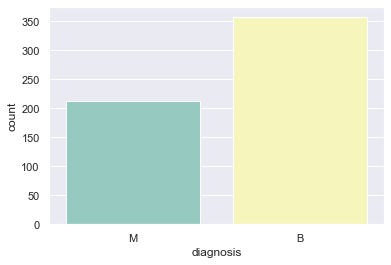

In [30]:
#Visualizing the tumor patients- benign and malignant using seaborn
sns.set(style="darkgrid")
tumor = sns.countplot(label, label = "COUNT", palette="Set3", )


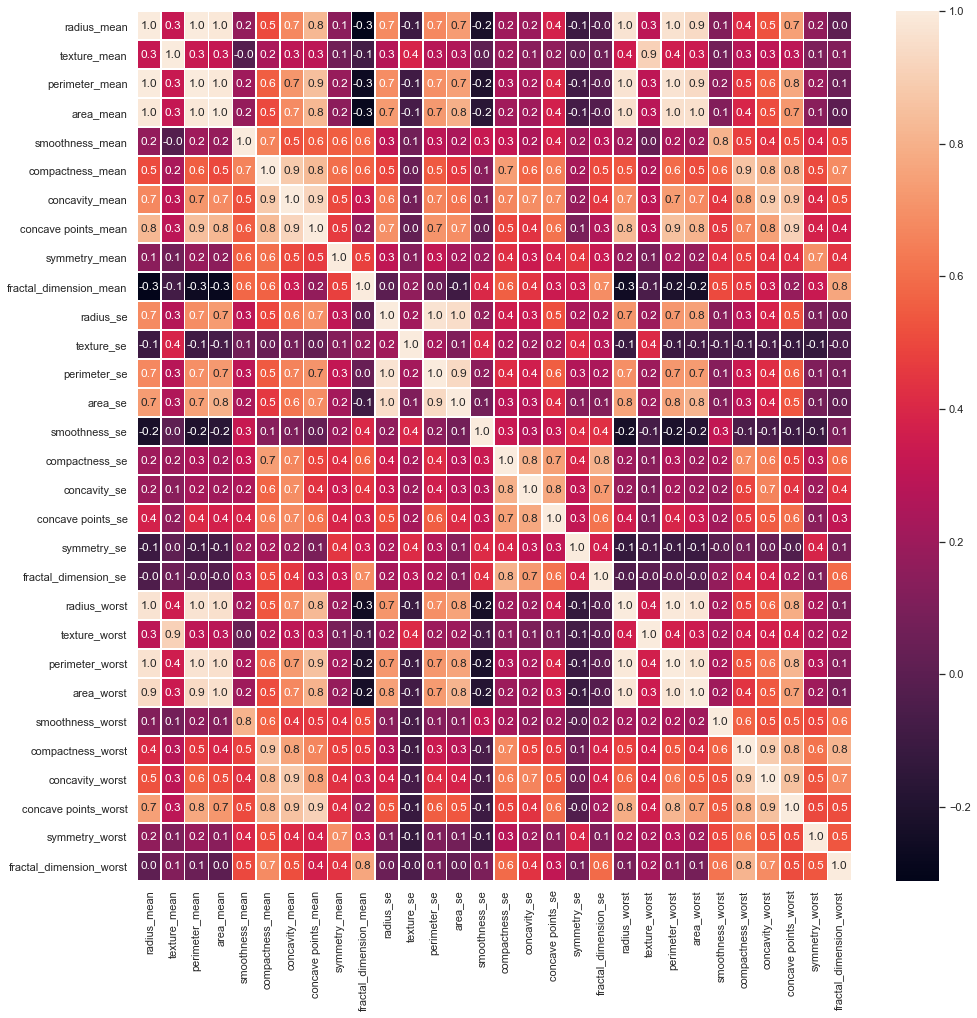

In [31]:
#Visualizing the correlation between different features 
#Using a heatmap in seaborn to achieve this
#correlation map
plt.figure(figsize=(16,16))
sns.heatmap(features.corr(), annot=True, linewidths=.5, fmt= '.1f')

# Correlation heatmap
The above correlation heatmap shows a 2D correlation matrix between two discrete dimensions, using colored cells to represent data from usually a monochromatic scale.

Observation from the above heatmap - 
Compactness_mean, concavity_mean and concave points_mean are correlated with each other.
Apart from these, radius_se, perimeter_se and area_se are correlated.
radius_worst, perimeter_worst and area_worst are correlated. 
Compactness_worst, concavity_worst and concave points_worst.
Compactness_se, concavity_se and concave points_se are correlated.
Texture_mean and texture_worst are correlated.
area_worst and area_mean are correlated.

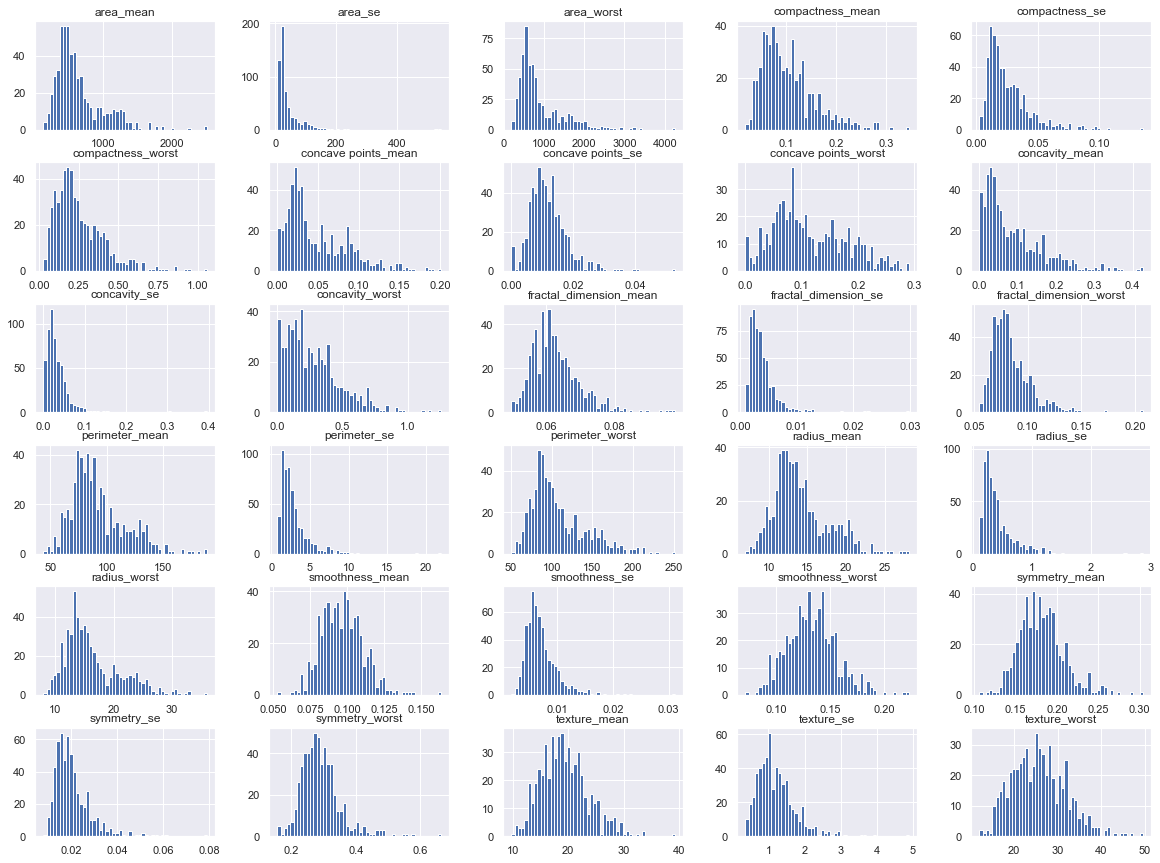

In [32]:
#Looking at the histogram of the dataset features
features.hist(bins=50,figsize=(20,15))
plt.show()

The above cell shows the histogram for all the features in the dataset.
It is used to graphically represent the numerical data distribution.
A histogram is used to summarize discrete or continuous data that are measured on an interval scale.

In [38]:
#Mapping the diagnosis -B and M to 0 and 1 in the diagnosis column to use it for visualizing the data
#create a mapping dictionary
mapdict = {"B" : 0, "M" : 1}
data["diagnosis"] = data["diagnosis"].replace(mapdict)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [52]:
from sklearn import preprocessing 
featprep =preprocessing.scale(features)
featscaled = pd.DataFrame(featprep, columns = features.columns)
featscaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
#Also add the diagnosis column to this 
featscaled.insert(loc = 30, column = 'diagnosis' , value = data["diagnosis"])

In [60]:
featscaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1


In [62]:
features_mean = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

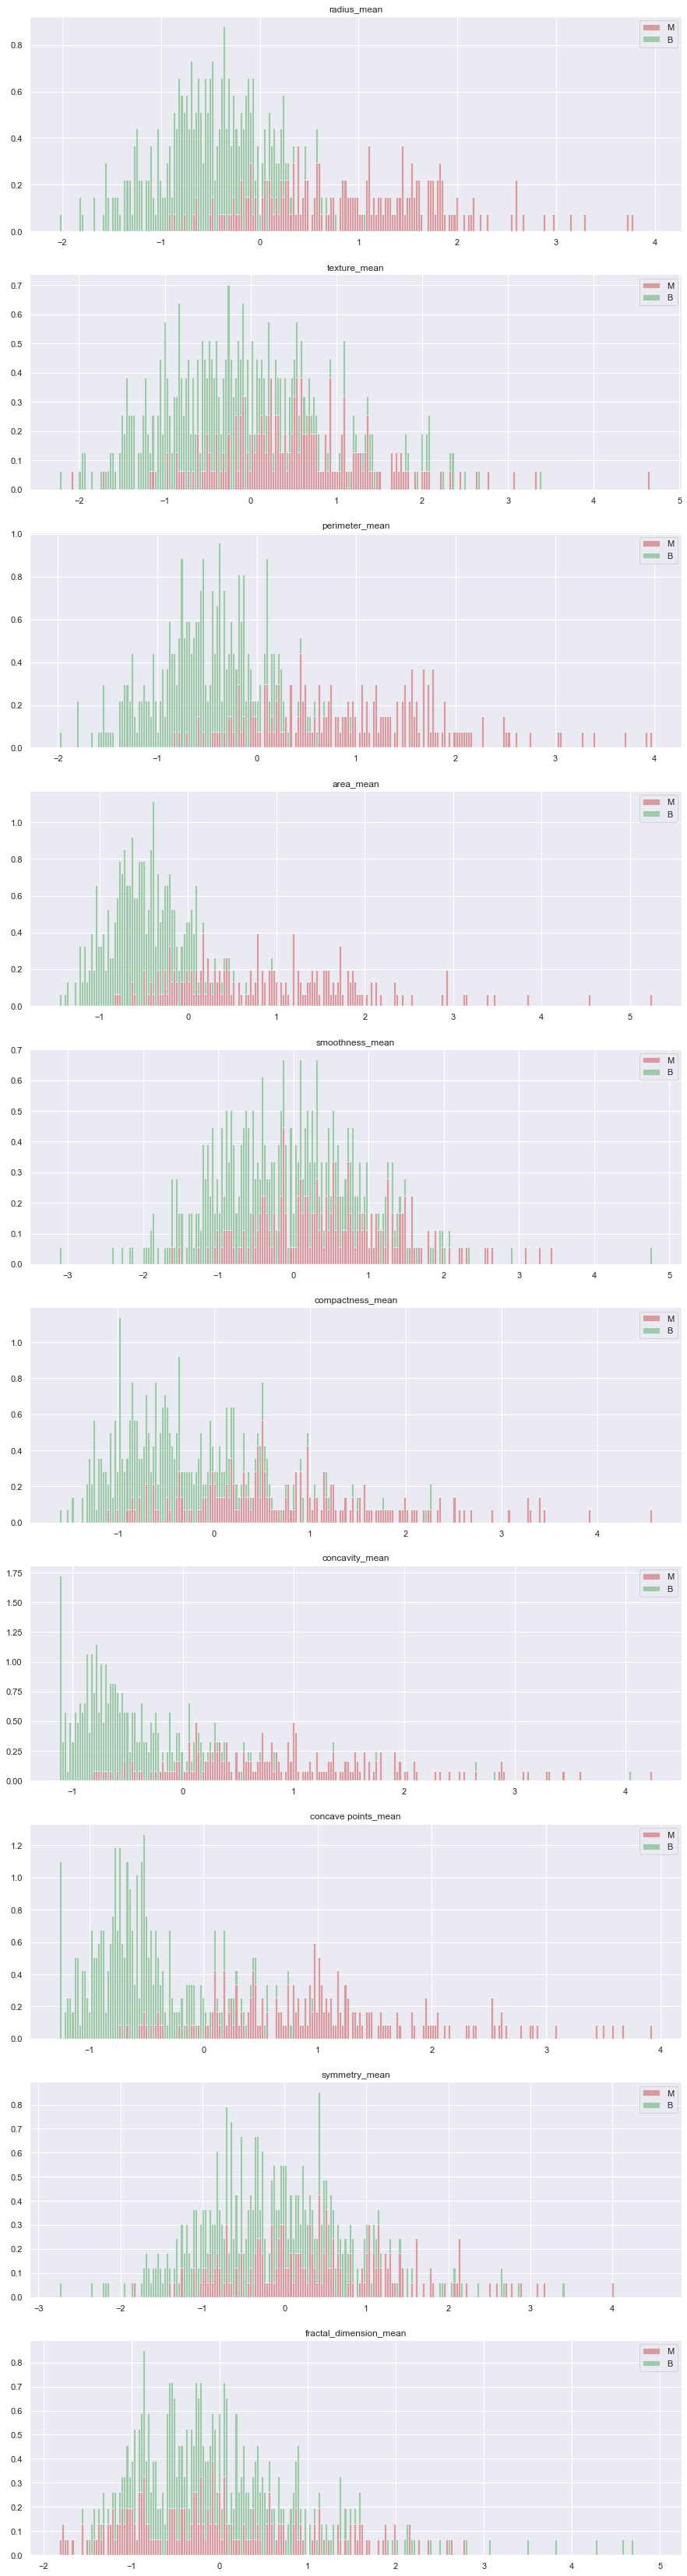

In [63]:
# Splitting the dataset into malignant and benign.
dm =featscaled[featscaled["diagnosis"] ==1]
db= featscaled[featscaled["diagnosis"] ==0]

#Plotting the features 
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(15,60))
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(featscaled[features_mean[idx]]) - min(featscaled[features_mean[idx]]))/250
    ax.hist([dm[features_mean[idx]],db[features_mean[idx]]], bins=np.arange(min(featscaled[features_mean[idx]]), max(featscaled[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, normed = True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.show()

 ### Visualizing the data, diagnosis vs all other features 

<Figure size 432x288 with 0 Axes>

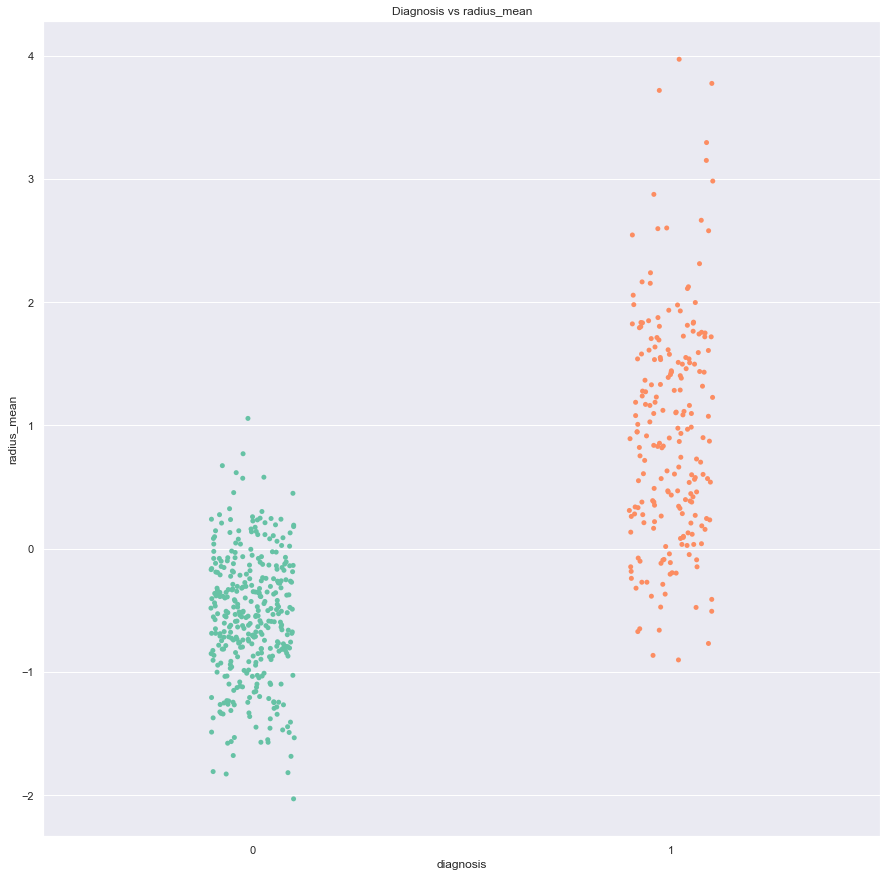

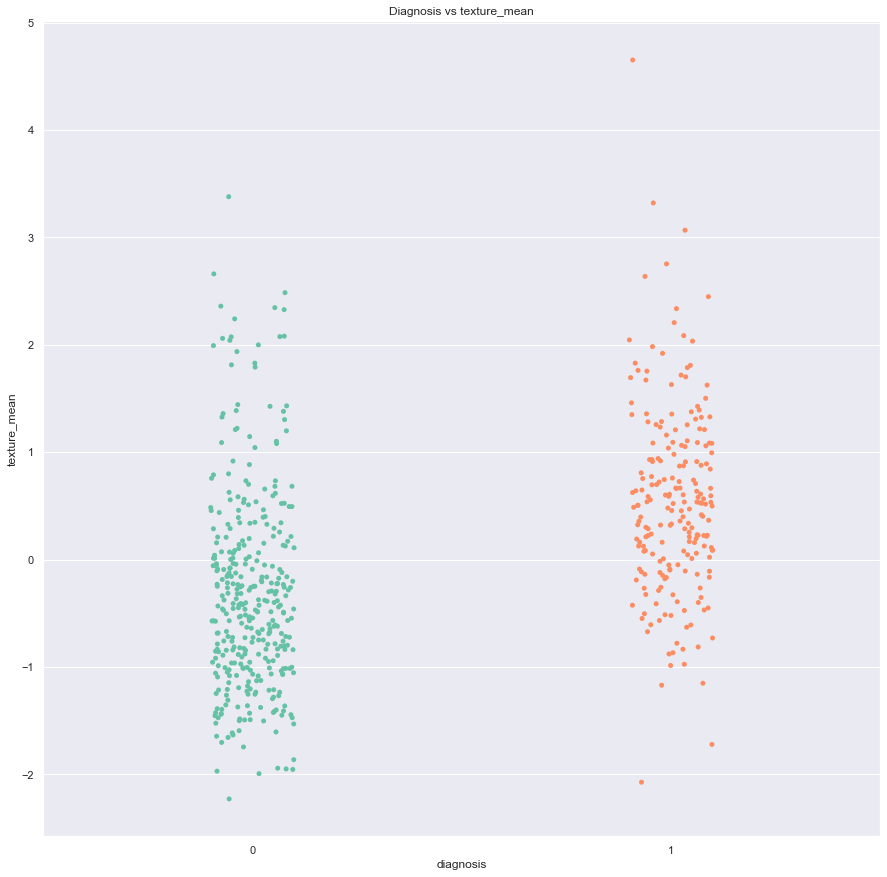

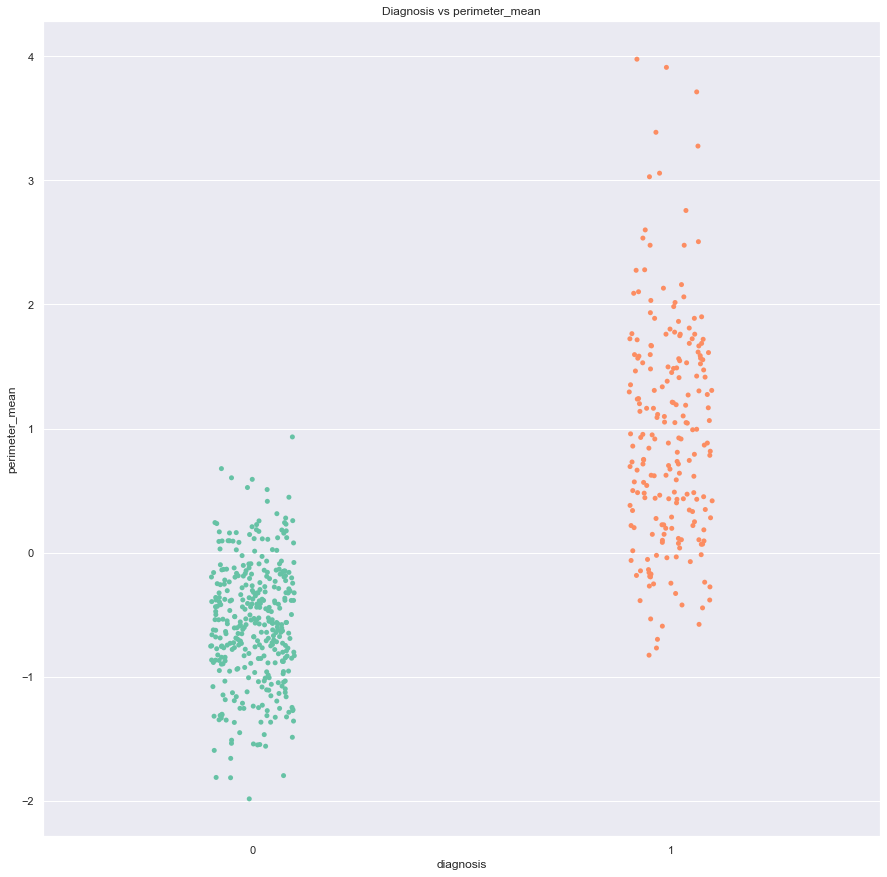

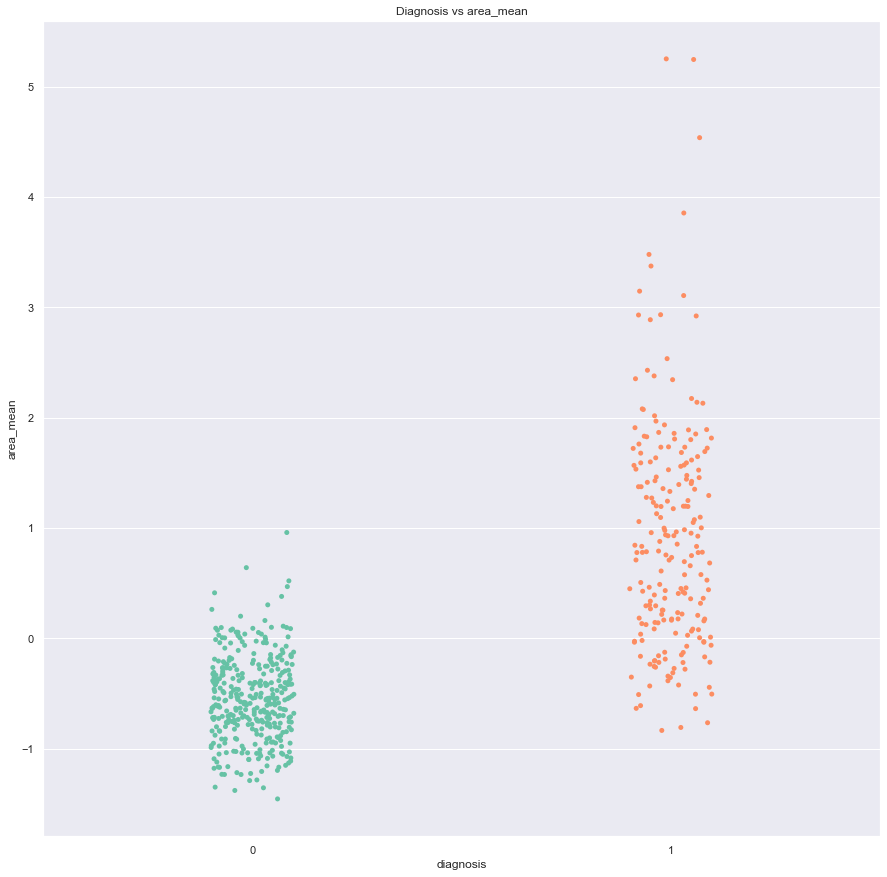

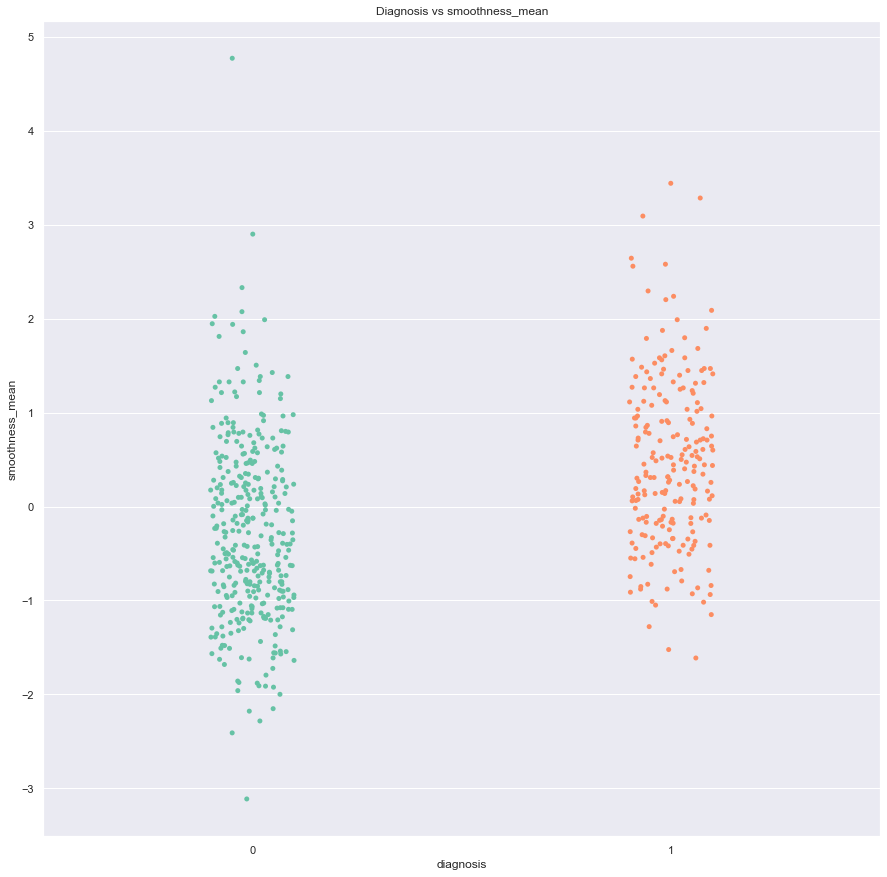

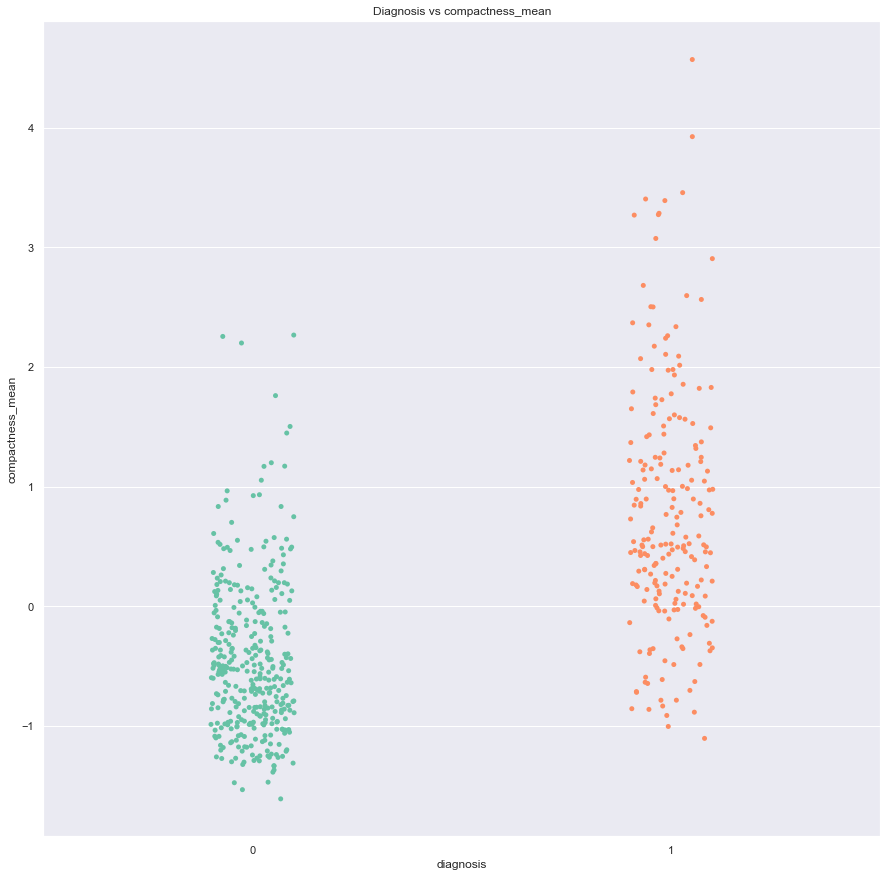

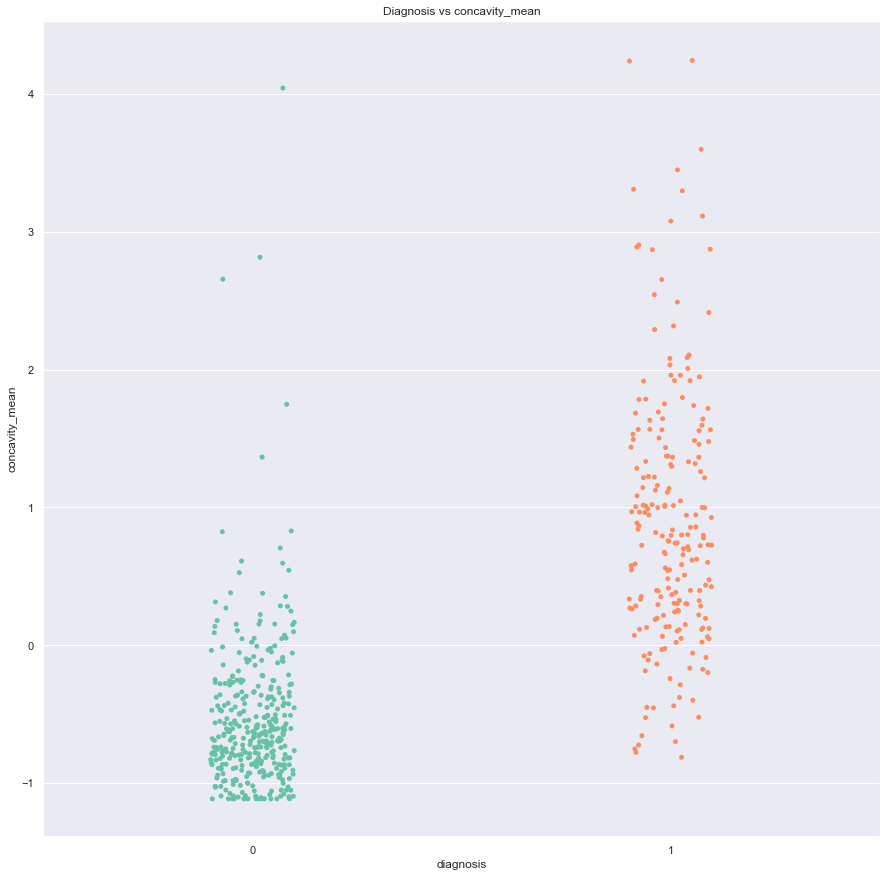

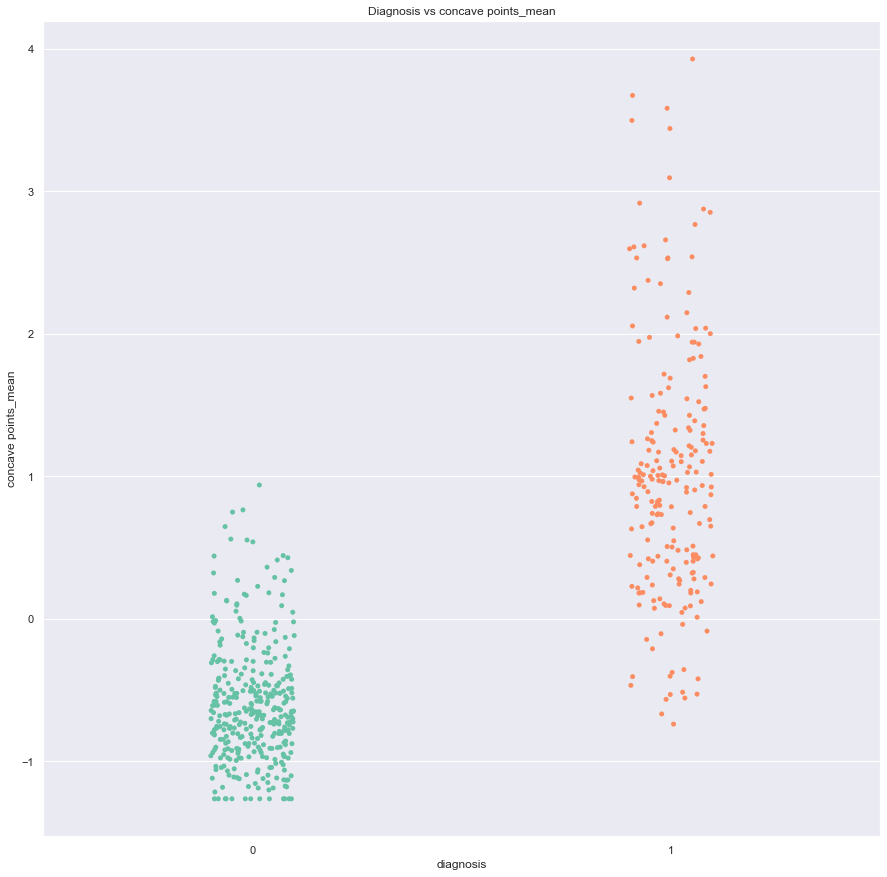

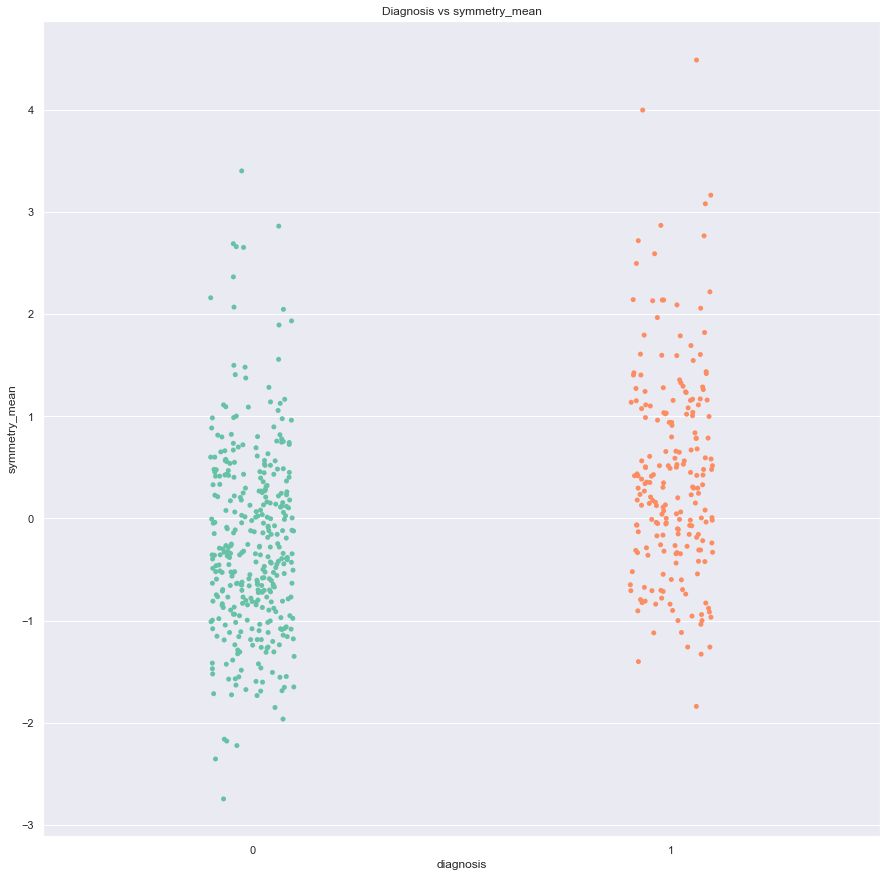

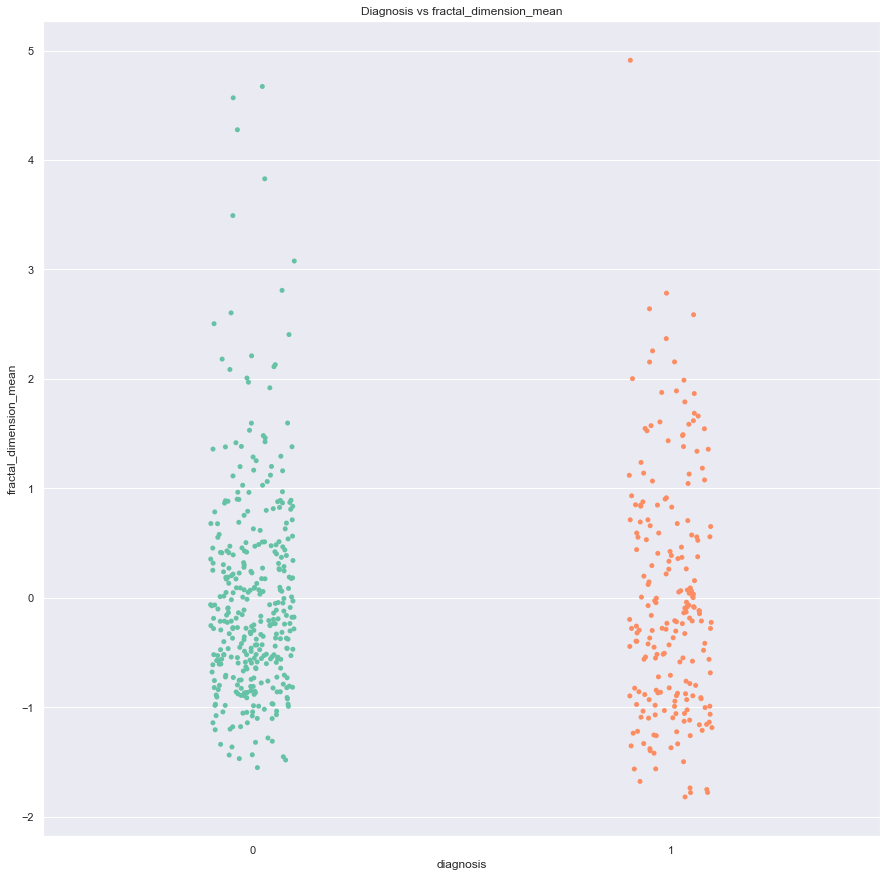

In [68]:
featdrop = featscaled.drop('diagnosis',axis=1)
featdrop = featdrop[features_mean]
for index,columns in enumerate(featdrop):
    plt.figure(index)
    plt.figure(figsize=(15,15))
    sns.stripplot(x='diagnosis', y= columns, data= featscaled, jitter=True, palette = 'Set2');
    plt.title('Diagnosis vs ' + str(columns))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

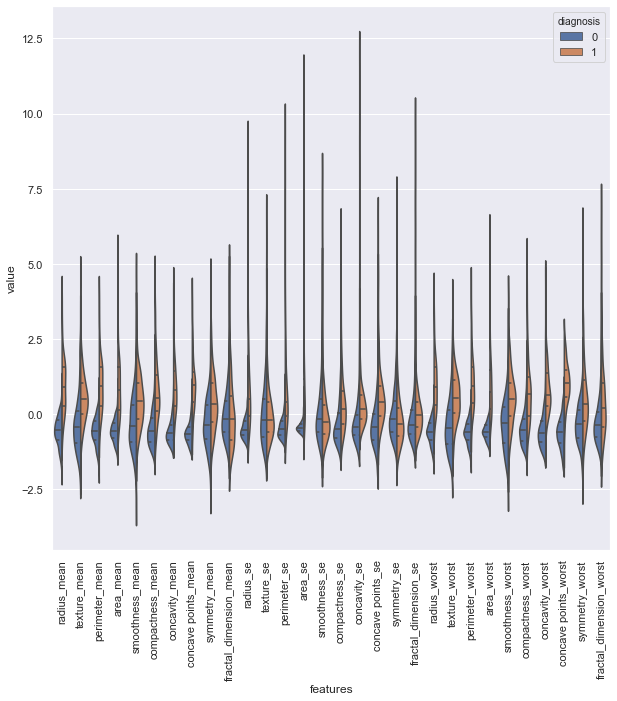

In [71]:
data2 = pd.melt(featscaled ,id_vars="diagnosis",var_name="features",value_name="value")
#print(data)
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data2,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

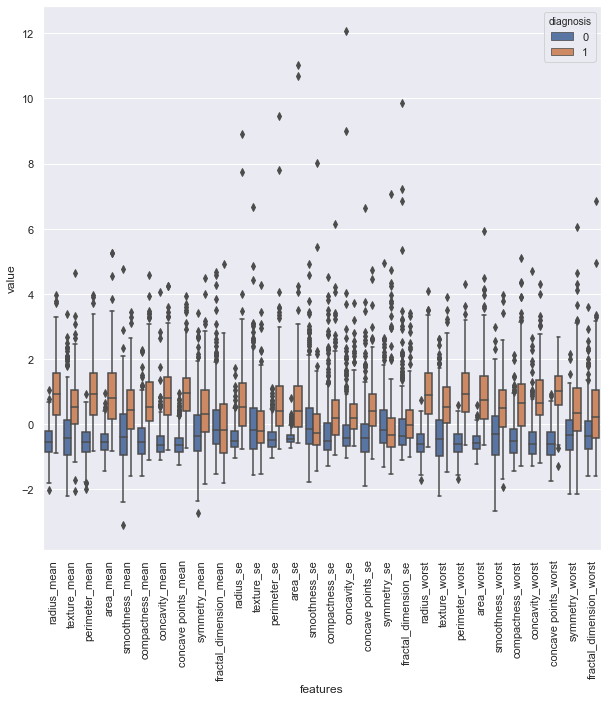

In [72]:
#Using boxplot to see the outliers 
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data2)
plt.xticks(rotation=90)

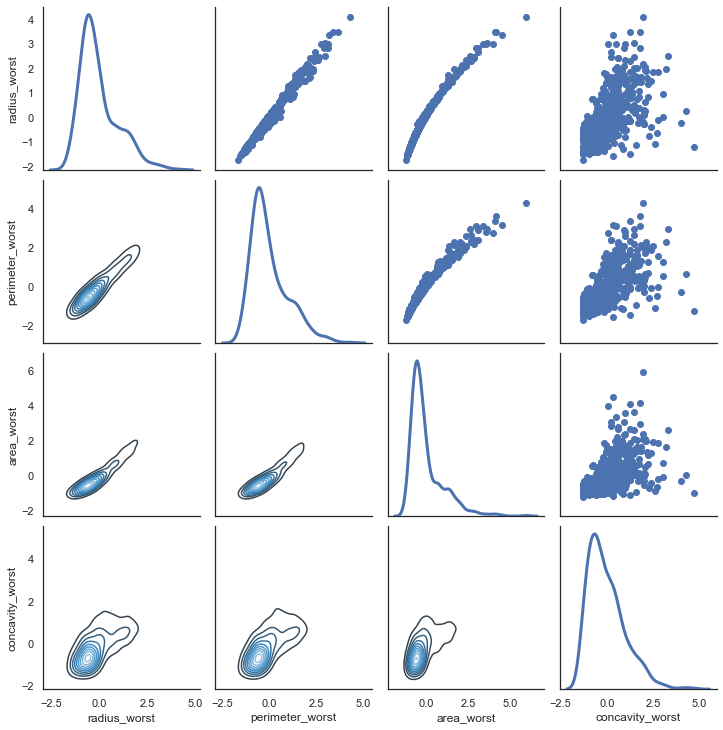

In [73]:
sns.set(style="white")
dfplot = featscaled.loc[:,['radius_worst','perimeter_worst','area_worst','concavity_worst']]
g =sns.PairGrid(dfplot,diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

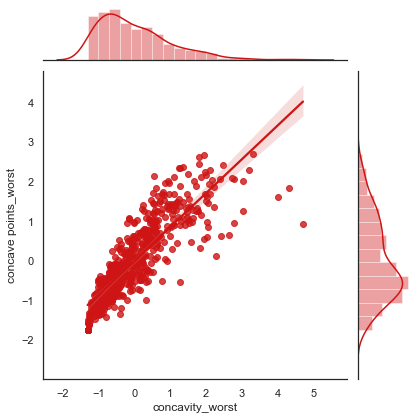

In [75]:
sns.jointplot(featscaled.loc[:,'concavity_worst'], featscaled.loc[:,'concave points_worst'], kind="reg", color="#ce1414")

concavity_worst and concave point_worst looks like similar from the boxplot, but we can take a closer look using joint plot. Looking at the pearson correlation value from the plots we can see the correlation. It will be useful to know when we want to choose features for classification. If the features are highly correlated we can drop one of them during classification. In the above joint plot we can see a high correlation between the two

swarm plot time:  0.0  s


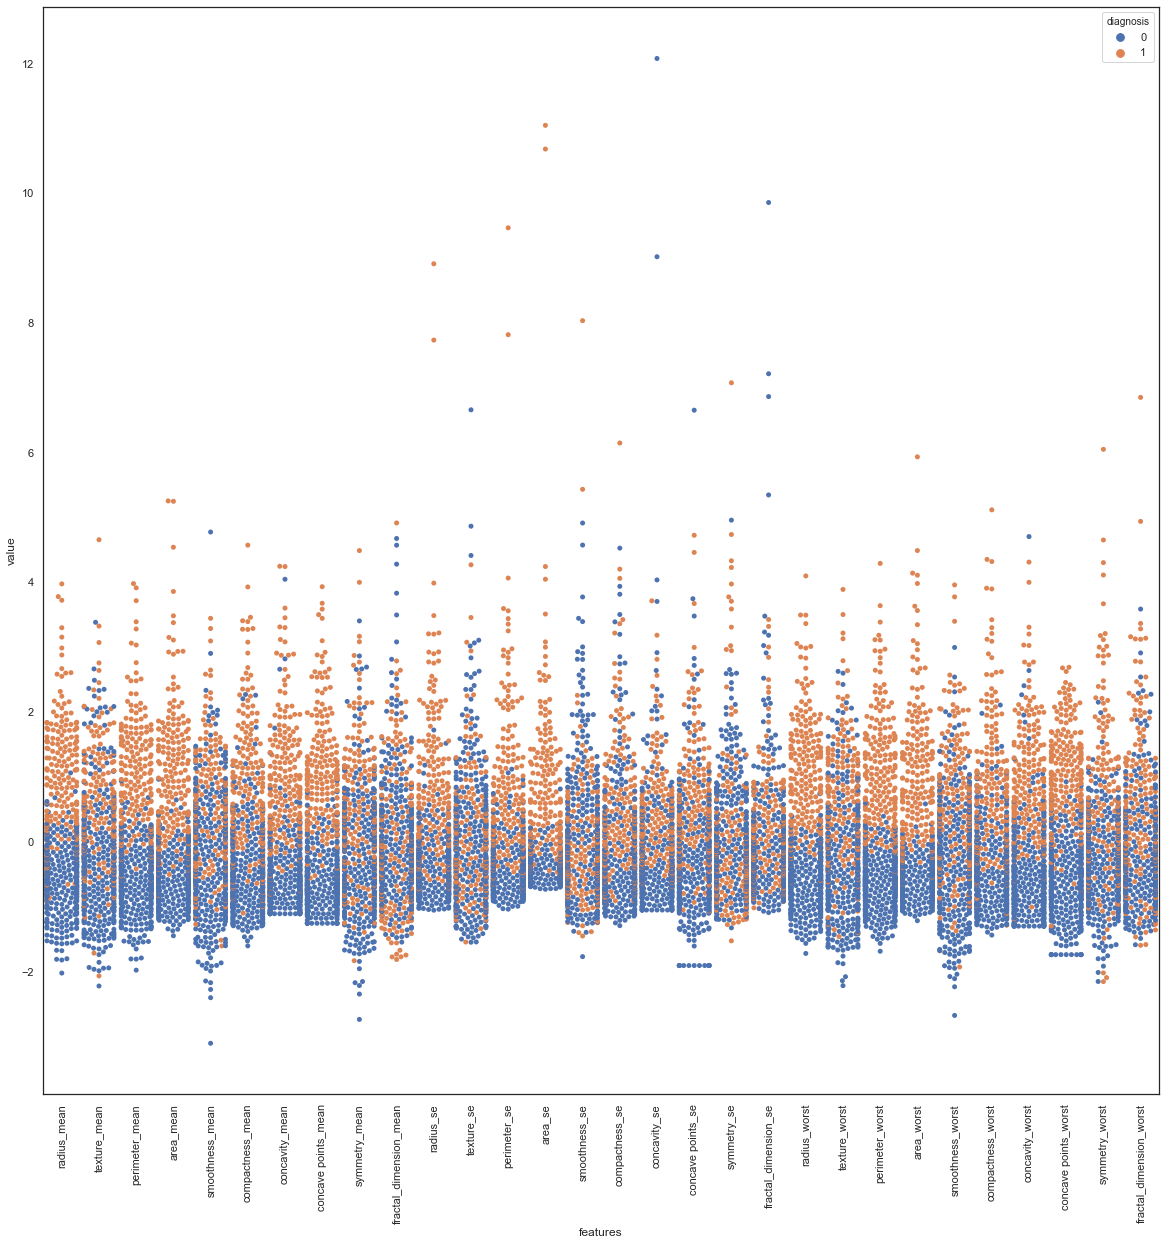

In [79]:
import time
plt.figure(figsize=(20,20))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data2)
tic = time.time()
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")

In the above visualization, I have used a swarm plot. It is a type of scatter plot that is used for representing categorical values. 
Even though a swarm plot is very similar to the strip plot,it avoids the overlapping of points.
It is another way of plotting the distribution of an attribute or the joint distribution of a couple of attributes.

### References: 
https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)